In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
from pathlib import Path
import os
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Preprocess

In [ ]:
import re
from pathlib import Path
import os
import pickle
import numpy as np

# Initialize the dictionary to hold file transcriptions
transcriptionsdict = dict()
# Define the regex pattern to capture the audio code
audio_code_regex = re.compile(r'^(\S+)\s')
# Define the regex pattern to capture the transcription part
transcription_regex = re.compile(r':\s*(.*)$')

# Loop through each session
for numsess in range(1, 6):
    dir_transcripts = "/content/drive/My Drive/ML_mscdata/IEMOCAP_full_release/Session"+str(numsess)+"/dialog/transcriptions/"

    txt_transcripts = os.listdir(dir_transcripts)
    # Loop through each file in the directory
    for file in txt_transcripts:
        # Ensure we are reading a file
        # Open and read the file
        b = dir_transcripts + file
        with open(b,'r') as f:
            text = f.readlines()

        # Process each line in the file
        for line in text:
            audio_match = re.search(audio_code_regex, line)
            match_transcription = re.search(transcription_regex, line)
            if audio_match and match_transcription:
                audio_key = audio_match.groups()[0]
                transcription_value = match_transcription.groups()[0].strip()
                # Add the audio code and transcription to the dictionary
                #assuming keys unique
                transcriptionsdict.update({audio_key: transcription_value})

In [ ]:
def insert_space_before_punctuation(s):
    result = []
    for char in s:
        if char in '.!?':
            result.append(' ')
        result.append(char)
    return ''.join(result)

In [ ]:
# Stop words
import nltk
nltk.download('stopwords')
#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import scipy
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
!python3 -m textblob.download_corpora

def tweet_normalization(text):
    # convert text to lowercase
    text = text.lower()
    text = insert_space_before_punctuation(text)
    # remove non alphanumeric character
    text = re.sub(r'[^A-Za-z0-9.!?]+', ' ', text)
    #lematization techniques
    lemmatizer = WordNetLemmatizer()
    # stop words definition
    stop_words = nltk.corpus.stopwords.words('english')
    # combine all previous methods in order to clear the text
    result = ' '.join(
        lemmatizer.lemmatize(term)#term
        for term in text.split()
        if term not in set(stop_words)
    )
    #filtered_words = ' '.join(word for word in text.split() if word not in set(stop_words))
    #result = filtered_words
    #result=text

    return result

def preprocess(input_df):
    # Remove rows with missing values in column col
    input_df.dropna(inplace=True)
    # Speed up code using numpy vectorization
    vfunc = np.vectorize(tweet_normalization)
    input_df['new_transcription'] = vfunc(input_df.transcription)
    # return processed input_df
    return input_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
df_audio = pd.read_csv('/content/drive/My Drive/ML_mscdata/IEMOCAP_full_release/IEMOCAP_full_release/preprocesseddata/oversampling_audio_features.csv')

# # Display the first few rows of the dataset
# df_audio['label'] = df_audio['label'].replace({3: 2, 4: 2, 5: 3, 6: 4, 7: 5, 0: 0, 1: 1, 2: 1})
# # Remove rows with the specific label
# df_audio = df_audio[df_audio['label'] != 8]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()
df_audio[df_audio.columns[3:]] = scaling.fit_transform(df_audio[df_audio.columns[3:]])
df_audio.head()

# x_train_audio, x_test_audio = train_test_split(df_audio, test_size=0.20)
# print(x_train_audio.shape)
# (x_test_audio.shape)

,Unnamed: 0,wav_file,label,sig_mean,sig_std,rmse_mean,rmse_std,silence,harmonic,auto_corr_max,auto_corr_std
0,0,Ses01M_script02_1_F001,2,0.019368,0.031179,0.019496,0.055775,0.574933,0.228740,0.001440,0.000142
1,1,Ses01M_script02_1_F002,4,0.024850,0.041019,0.027618,0.070081,0.753255,0.228730,0.002389,0.000208
2,2,Ses01M_script02_1_F005,0,0.099805,0.123782,0.106320,0.159666,0.323432,0.228861,0.017251,0.003627
3,3,Ses01M_script02_1_F007,5,0.027278,0.036102,0.029279,0.050657,0.420000,0.229686,0.001837,0.000098
4,4,Ses01M_script02_1_F008,5,0.008010,0.009314,0.008396,0.011286,0.000000,0.228431,0.000119,0.000011


In [ ]:
df_iemo2 = pd.read_csv('/content/drive/My Drive/ML_mscdata/IEMOCAP_full_release/IEMOCAP_full_release/preprocesseddata/df_iemocap_oversampling.csv')
print(df_iemo2.shape)
# df_iemo2 = pd.read_csv('/content/drive/My Drive/ML_mscdata/IEMOCAP_full_release/IEMOCAP_full_release/preprocesseddata/df_iemocap.csv')
# print(df_iemo2.shape)

df_iemo2_train, df_iemo2_test = train_test_split(df_iemo2, test_size=0.20)
audio_train, audio_test = train_test_split(df_audio, test_size=0.20)

(9504, 4)


In [ ]:
# Prepare text data
#df_iemo_train, df_iemo_test = train_test_split(df_iemo2, test_size=0.20)
text_train_combined = pd.DataFrame()
pd.set_option('display.max_colwidth', None)
text_train_combined['wav_file_names'] = audio_train['wav_file']

text_train_combined['transcription'] = [transcriptionsdict[code] for code in audio_train['wav_file']]

text_train_combined2 = preprocess(text_train_combined)



# text_combined2['label'] = df_iemo2 ['emotions']
# text_combined2['label'] = text_combined2['label'].replace({3: 2, 4: 2, 5: 3, 6: 4, 7: 5, 0: 0, 1: 1, 2: 1})
# text_combined2 = text_combined2[text_combined2['label'] != 8]
text_train_combined2[:10]
text_train_combined2.shape

(7603, 3)

In [ ]:
text_test_combined = pd.DataFrame()
pd.set_option('display.max_colwidth', None)
text_test_combined['wav_file_names'] = audio_test['wav_file']

text_test_combined['transcription'] = [transcriptionsdict[code] for code in audio_test['wav_file']]

text_test_combined2 = preprocess(text_test_combined)


text_test_combined2[:10]
text_test_combined2.shape

text_test_combined2[:10]
text_test_combined2.shape

(1901, 3)

# Concat speech and text

In [ ]:
# use the cv in our sets to convert the words
#passing the train and test set and validation set from the csv
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

tfidf_vectors = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='utf-8', ngram_range=(1, 2), stop_words='english') #latin-1

# Concatenate column 'A' from both DataFrames vertically
concatenated_column = pd.concat([text_train_combined2['new_transcription'], text_test_combined2['new_transcription']], ignore_index=True)
X_train = tfidf_vectors.fit_transform(concatenated_column)

x_train_text = X_train[:text_train_combined2.shape[0]]
x_test_text = X_train[text_train_combined2.shape[0]:]

print(X_train.shape, x_train_text.shape, x_test_text.shape)
print("edw",audio_train.shape)
print(x_train_text.toarray().shape)
print(x_train_text)

(9504, 2230) (7603, 2230) (1901, 2230)
edw (7603, 11)
(7603, 2230)
  (0, 2020)	1.0
  (1, 1673)	1.0
  (2, 1905)	0.25086902549789963
  (2, 812)	0.4083571474230477
  (2, 103)	0.34316441301544365
  (2, 1697)	0.3885448350450824
  (2, 2119)	0.3002209846251666
  (2, 141)	0.34316441301544365
  (2, 1924)	0.3398623057625839
  (2, 2008)	0.2963160425195587
  (2, 1209)	0.3006263978621132
  (3, 2099)	0.48915674207590365
  (3, 764)	0.481204409463867
  (3, 1282)	0.3810489082679222
  (3, 2078)	0.24121321809802893
  (3, 761)	0.3418837664270638
  (3, 720)	0.45705732810062394
  (4, 1710)	0.7517044046940944
  (4, 570)	0.6595001804120278
  (5, 1619)	0.5495889609696362
  (5, 2205)	0.4461094364898454
  (5, 1596)	0.26316495522715283
  (5, 593)	0.38028917532314777
  (5, 2187)	0.5339126278028637
  (7, 956)	0.7280950684943523
  :	:
  (7596, 916)	0.4219106667251378
  (7596, 79)	0.3342363789379943
  (7596, 1657)	0.3608785143180445
  (7596, 788)	0.38785034715958977
  (7596, 914)	0.3369468608489202
  (7597, 2154)	1.0

In [ ]:
print(audio_train["label"][:10])

5188    2
6911    2
3159    2
6500    0
378     0
2371    5
8239    3
933     2
8209    3
2683    0
Name: label, dtype: int64


In [ ]:
combined_x_train = np.concatenate((np.array(audio_train[audio_train.columns[3:]]), x_train_text.toarray()), axis=-1)
combined_x_test = np.concatenate((np.array(audio_test[audio_test.columns[3:]]), x_test_text.toarray()), axis=1)

attributes_dictionary = dict()

attributes_dictionary['x_train'] = combined_x_train
attributes_dictionary['x_test'] = combined_x_test
attributes_dictionary['y_train'] = np.array(audio_train["label"])
attributes_dictionary['y_test'] = np.array(audio_test["label"])

print(combined_x_train.shape, combined_x_test.shape)

(7603, 2238) (1901, 2238)


# Models

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

random_forest = RandomForestClassifier(n_estimators=600, min_samples_split=25)#n_estimators=700,criterion= 'gini',max_depth= 30, max_features=10
random_forest.fit(attributes_dictionary['x_train'], attributes_dictionary['y_train'])

y_predict_lr3_3 = random_forest.predict(attributes_dictionary['x_test'])

print('Accuracy Score:', accuracy_score(attributes_dictionary['y_test'], y_predict_lr3_3))

#Create classification report
class_report3=classification_report(attributes_dictionary['y_test'], y_predict_lr3_3, zero_division=True)
print(class_report3)

Accuracy Score: 0.6480799579168859
              precision    recall  f1-score   support

           0       0.55      0.41      0.47       214
           1       0.69      0.41      0.51       337
           2       0.52      0.82      0.63       572
           3       0.96      1.00      0.98       195
           4       0.93      1.00      0.97       257
           5       0.55      0.27      0.36       326

    accuracy                           0.65      1901
   macro avg       0.70      0.65      0.65      1901
weighted avg       0.66      0.65      0.63      1901



In [ ]:
C = np.array(confusion_matrix(attributes_dictionary['y_test'], y_predict_lr3_3))

confmtrx = pd.DataFrame(C, index=['angry, true','happy, true','sad, true','fear, true','sur, true','neutral, true'],
                        columns=['angry, predicted','happy, predicted','sad, predicted','fear, predicted','sur, predicted','neutral, predicted'])

confmtrx.loc['sum'] = confmtrx.sum()
confmtrx['sum'] = confmtrx.sum(axis=1)
confmtrx

,"angry, predicted","happy, predicted","sad, predicted","fear, predicted","sur, predicted","neutral, predicted",sum
"angry, true",87,16,99,0,4,8,214
"happy, true",21,138,143,5,4,26,337
"sad, true",33,26,467,2,5,39,572
"fear, true",0,0,0,195,0,0,195
"sur, true",0,0,0,0,257,0,257
"neutral, true",16,21,194,2,5,88,326
sum,157,201,903,204,275,161,1901


AUC for class ang: 0.6825241400705783
AUC for class hap: 0.6846071095190753
AUC for class sad: 0.7441836756170842
AUC for class fea: 0.9973622508792498
AUC for class sur: 0.9945255474452555
AUC for class neu: 0.611794721978771


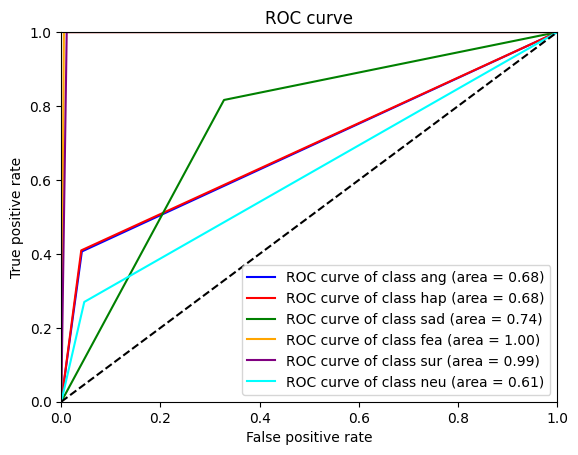

In [ ]:
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Define class names
class_names = ['ang', 'hap', 'sad', 'fea', 'sur', 'neu']

# Convert y_predict_lr3 to a one-hot encoded format
n_classes = len(class_names)
y_pred_one_hot = np.zeros((y_predict_lr3_3.size, n_classes))
y_pred_one_hot[np.arange(y_predict_lr3_3.size), y_predict_lr3_3.astype(int)] = 1

# Initialize lists to store false positive rates, true positive rates, and AUCs
fprs = []
tprs = []
aucs = []

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    # Compute the ROC curve and AUC for the i-th class
    fpr, tpr, _ = metrics.roc_curve(attributes_dictionary['y_test'] == i, y_pred_one_hot[:, i])
    auc = metrics.auc(fpr, tpr)
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(auc)
    print(f"AUC for class {class_names[i]}: {auc}")

# Plotting the ROC curves
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan']
plt.figure()

for i in range(n_classes):
    plt.plot(fprs[i], tprs[i], color=colors[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(class_names[i], aucs[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()


## Multinomial NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

multinaivebayes_classifier = MultinomialNB()

multinaivebayes_classifier.fit(attributes_dictionary['x_train'], attributes_dictionary['y_train'])

y_predict_lr4 = multinaivebayes_classifier.predict(attributes_dictionary['x_test'])

print('Accuracy Score:', accuracy_score(attributes_dictionary['y_test'], y_predict_lr4))

#Create classification report
class_report2=classification_report(attributes_dictionary['y_test'], y_predict_lr4)
print(class_report2)

Accuracy Score: 0.5891635981062598
              precision    recall  f1-score   support

           0       0.78      0.36      0.50       214
           1       0.77      0.54      0.64       337
           2       0.46      0.85      0.60       572
           3       0.94      0.61      0.74       195
           4       0.80      0.65      0.72       257
           5       0.50      0.26      0.35       326

    accuracy                           0.59      1901
   macro avg       0.71      0.55      0.59      1901
weighted avg       0.65      0.59      0.58      1901



In [ ]:
C = np.array(confusion_matrix(attributes_dictionary['y_test'], y_predict_lr4))

confmtrx = pd.DataFrame(C, index=['angry, true','happy, true','sad, true','fear, true','sur, true','neutral, true'],
                        columns=['angry, predicted','happy, predicted','sad, predicted','fear, predicted','sur, predicted','neutral, predicted'])

confmtrx.loc['sum'] = confmtrx.sum()
confmtrx['sum'] = confmtrx.sum(axis=1)
confmtrx

,"angry, predicted","happy, predicted","sad, predicted","fear, predicted","sur, predicted","neutral, predicted",sum
"angry, true",78,8,102,0,11,15,214
"happy, true",2,182,110,5,8,30,337
"sad, true",15,18,489,0,10,40,572
"fear, true",0,0,67,119,9,0,195
"sur, true",0,2,89,0,166,0,257
"neutral, true",5,26,203,3,3,86,326
sum,100,236,1060,127,207,171,1901


## Logistic Regression

In [ ]:
logisticreg_classifer = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=10000)
logisticreg_classifer.fit(attributes_dictionary['x_train'], attributes_dictionary['y_train'])

y_predict_lr5 = logisticreg_classifer.predict(attributes_dictionary['x_test'])

print('Accuracy Score:', accuracy_score(attributes_dictionary['y_test'], y_predict_lr5))

#Create classification report
class_report3=classification_report(attributes_dictionary['y_test'], y_predict_lr5)
print(class_report3)

Accuracy Score: 0.6038926880589164
              precision    recall  f1-score   support

           0       0.69      0.45      0.55       214
           1       0.74      0.61      0.67       337
           2       0.49      0.75      0.59       572
           3       0.89      0.70      0.79       195
           4       0.78      0.72      0.75       257
           5       0.43      0.29      0.35       326

    accuracy                           0.60      1901
   macro avg       0.67      0.59      0.62      1901
weighted avg       0.63      0.60      0.60      1901



## XGBoost

In [ ]:
import xgboost

emotion_dict = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5}

model_xgb = xgboost.XGBClassifier(max_depth=7, learning_rate=0.008, objective='multi:softprob',
                                   n_estimators=600, num_class=len(emotion_dict),
                                   booster='gbtree', n_jobs=4)
model_xgb.fit(attributes_dictionary['x_train'],  attributes_dictionary['y_train'])

y_predict_lr6 = model_xgb.predict(attributes_dictionary['x_test'])

print('Accuracy Score:', accuracy_score(attributes_dictionary['y_test'], y_predict_lr6))

class_report4=classification_report(attributes_dictionary['y_test'], y_predict_lr6)
print(class_report4)

Accuracy Score: 0.6128353498158864
              precision    recall  f1-score   support

           0       0.57      0.45      0.50       214
           1       0.67      0.38      0.49       337
           2       0.49      0.82      0.61       572
           3       0.98      1.00      0.99       195
           4       0.90      0.74      0.81       257
           5       0.49      0.26      0.34       326

    accuracy                           0.61      1901
   macro avg       0.68      0.61      0.62      1901
weighted avg       0.64      0.61      0.60      1901



## Ensemble Probabilites from the 4 models

In [ ]:
# Predict
pred_probs1 = random_forest.predict_proba(attributes_dictionary['x_test'])
pred_probs2 = multinaivebayes_classifier.predict_proba(attributes_dictionary['x_test'])
pred_probs3 = logisticreg_classifer.predict_proba(attributes_dictionary['x_test'])
pred_probs4 = model_xgb.predict_proba(attributes_dictionary['x_test'])
print(pred_probs1)

[[0.00745606 0.02453775 0.11859841 0.         0.79162766 0.05778011]
 [0.17042942 0.18548966 0.42014124 0.03451526 0.04820941 0.14121501]
 [0.07526314 0.10068805 0.22323196 0.00434837 0.00911169 0.58735678]
 ...
 [0.04239588 0.03313771 0.13849383 0.0100013  0.68358627 0.092385  ]
 [0.06659    0.18666126 0.50917721 0.00562583 0.00451171 0.22743399]
 [0.22930165 0.18115062 0.49717243 0.00398932 0.00976971 0.07861627]]


In [ ]:
# Average of the predicted probabilites
averaging = (pred_probs1 +
                       pred_probs2 +
                       pred_probs3 +
                       pred_probs4)/4.0

print(averaging)
pred_new = np.argmax(averaging, axis=-1)
print(pred_new)

[[0.04492319 0.09811023 0.27017912 0.03658707 0.38698926 0.16321112]
 [0.15101919 0.28022591 0.27906456 0.04454843 0.05567585 0.18946607]
 [0.04575821 0.0683062  0.22233849 0.02230259 0.02460697 0.61668755]
 ...
 [0.02531271 0.03930222 0.07472297 0.01345839 0.77283919 0.07436451]
 [0.05654261 0.1310724  0.59905379 0.01637565 0.02059499 0.17636057]
 [0.19011263 0.11969852 0.3902474  0.02726322 0.04696775 0.22571049]]
[4 1 5 ... 4 2 2]


In [ ]:
print(attributes_dictionary['y_test'])

[4 1 2 ... 2 2 0]


In [ ]:
class_report5=classification_report(attributes_dictionary['y_test'], pred_new)
print(class_report5)

              precision    recall  f1-score   support

           0       0.71      0.45      0.55       214
           1       0.80      0.54      0.65       337
           2       0.53      0.87      0.66       572
           3       0.96      0.94      0.95       195
           4       0.92      0.91      0.92       257
           5       0.55      0.28      0.37       326

    accuracy                           0.67      1901
   macro avg       0.75      0.66      0.68      1901
weighted avg       0.70      0.67      0.66      1901



In [ ]:
y_predict_lr3_3

array([4, 2, 5, ..., 4, 2, 2])

In [ ]:
print('Accuracy Score:', accuracy_score(attributes_dictionary['y_test'], np.array(pred_new)))

Accuracy Score: 0.6743819042609153


In [ ]:
C = np.array(confusion_matrix(attributes_dictionary['y_test'], pred_new))

confmtrx = pd.DataFrame(C, index=['angry, true','happy, true','sad, true','fear, true','sur, true','neutral, true'],
                        columns=['angry, predicted','happy, predicted','sad, predicted','fear, predicted','sur, predicted','neutral, predicted'])

confmtrx.loc['sum'] = confmtrx.sum()
confmtrx['sum'] = confmtrx.sum(axis=1)
confmtrx

,"angry, predicted","happy, predicted","sad, predicted","fear, predicted","sur, predicted","neutral, predicted",sum
"angry, true",97,7,91,0,7,12,214
"happy, true",12,183,104,5,6,27,337
"sad, true",18,19,495,0,4,36,572
"fear, true",0,0,12,183,0,0,195
"sur, true",0,0,23,0,234,0,257
"neutral, true",9,20,201,3,3,90,326
sum,136,229,926,191,254,165,1901
